<a href="https://colab.research.google.com/github/vupadhyayula8/cs595/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`CS595 - Termination Project - Twitter Sentiment Analysis`

---



---



In [2]:
import numpy as np
import pandas as pd

In [3]:
# data = pd.read_csv('/Sentiment.csv')
data = pd.read_csv('twitter_training.csv')

In [4]:
len(data)

74682

In [5]:
data.head(20)

,ID,Borderlands,Sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [6]:
data.isnull().sum()

ID               0
Borderlands      0
Sentiment        0
text           686
dtype: int64

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [8]:
def display_wordcloud(data):
  data['text'] = data['text'].astype(str)
  text = ''.join(data['text'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

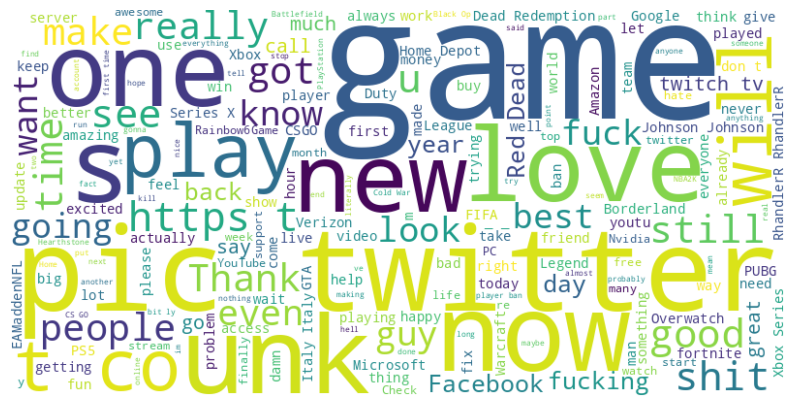

In [9]:
display_wordcloud(data)

In [10]:
positive_data = data[data['Sentiment'] == "Positive"]
negative_data = data[data['Sentiment'] == "Negative"]
neutral_data = data[data['Sentiment'] == "Neutral"]

<ipython-input-8-6b1c7a1fce58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


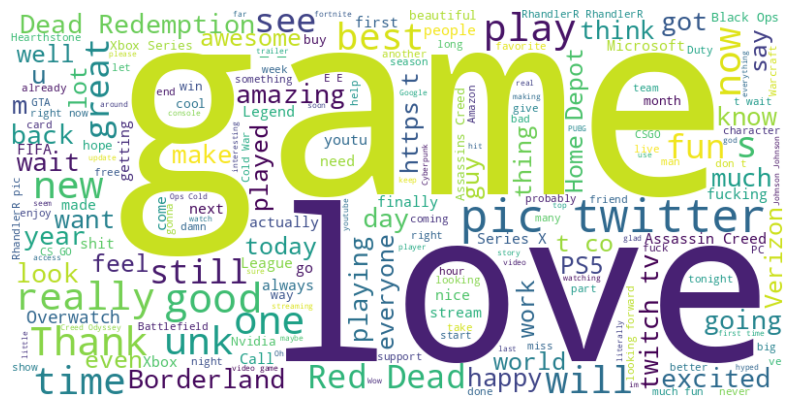

In [11]:
display_wordcloud(positive_data)

<ipython-input-8-6b1c7a1fce58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


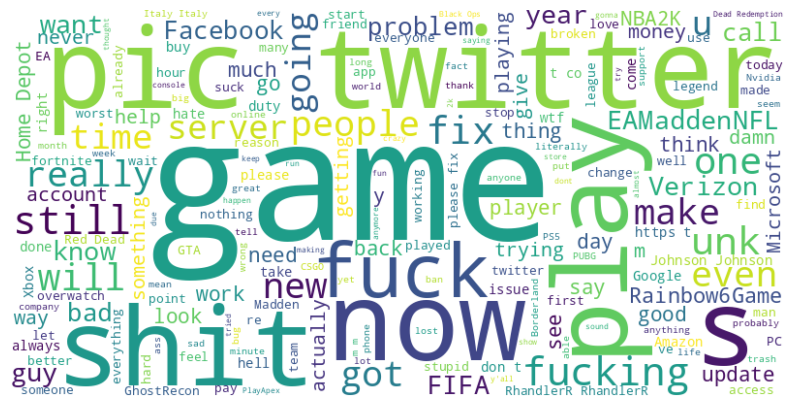

In [12]:
display_wordcloud(negative_data)

<ipython-input-8-6b1c7a1fce58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


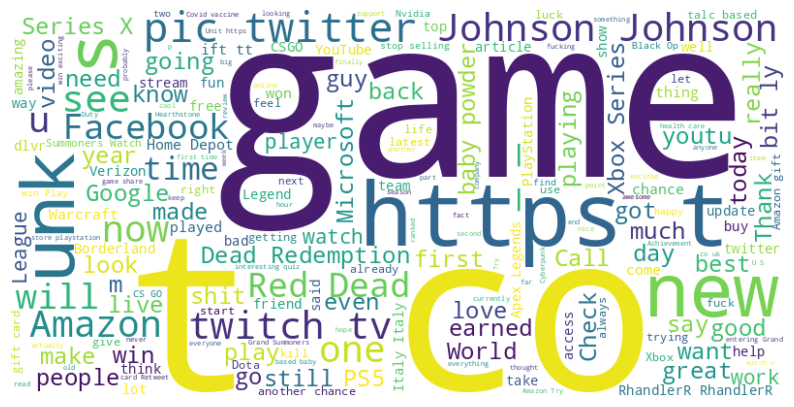

In [13]:
display_wordcloud(neutral_data)

Based on the above wordcloud plots it is to infer that larger words correspond to higher frequency of occurence.

In [28]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.classify import SklearnClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
#Split the data into train and test datasets
train, test = train_test_split(data, test_size = 0.3)

In [30]:
#cleaning and preProcessing the data
tweets = []
stopwords = set(stopwords.words("english"))
for index, row in train.iterrows():
    filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    cleaned = [word for word in filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT' and not '<' in word and not '>' in word]
    words_without_stopwords = [word for word in cleaned if not word in stopwords]
    tweets.append((words_without_stopwords, row.Sentiment))

In [31]:
#Diving the positive and negative datas from dataset
test_positive = test[ test['Sentiment'] == 'Positive']
test_positive = test_positive['text']
test_negative = test[ test['Sentiment'] == 'Negative']
test_negative = test_negative['text']

In [32]:
#Word extraction function
def take_words_from_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [33]:
#Defining a function to get word features
def word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

In [34]:
words_feature = word_features(take_words_from_tweets(tweets))
words_feature

dict_keys(['played', 'public', 'game', 'week.', 'fix', 'please,', 'goddamn', 'match', 'making', 'broken,', 'pressed', 'enter', 'instead', 'got', 'whopping', 'hour', 'ban', 'hero', 'selection.', 'shit', 'man.', 'achievements', 'battlefield', 'trueachievement', 'pts', 'trueachievements.com', 'gamer', 'princ3ss...', 'great', 'westerville', 'restaurant', 'friendly', 'staff', 'extremely', 'good', 'modern', 'italian', 'food.', 'says', 'michael', 'craig', 'google,', 'also', 'via', 'renown', 'media', 'reviews.', 'revlocal.', 'com', 'giammarcos', 'ita', 'people', 'like', 'it,', 'imo', 'ea,', 'games', 'quality', 'symbol', 'free.', 'gta', 'online', 'update', 'june/july', 'timeframe', 'cops', 'robbers-', 'book', 'facts', 'talk', 'much', 'dont', 'notice', 'getting', 'order', 'homedepot', 'perfect', 'way', 'get', 'ghostrecon', 'entry-level', 'price.', 'looks', 'even', 'reporting', 'wrong', 'next', 'entry', 'youtu.be/lr3awo_xbca', 'love', 'it!', 'best', 'mount!!', 'johnson', 'stop', 'selling', 'baby'

In [35]:
#Todo: remove words that are not necessary (which are links etc)